# SVD - Singular Value Decomposition

Reference: 

   *  "Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control"  by Brunton and Kutz:
   http://www.databookuw.com/
   * MIT 18.065 Matrix Methods in Data Analysis, Signal Processing, and Machine Learning
   https://www.youtube.com/watch?v=rYz83XPxiZo&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k&index=8&t=904s

**Intro:**
* Main Aim = Dimension Reduction
    * The SVD provides a systematic way to determine a low-dimensional approximation to high-dimensional data in terms of dominant patterns. 
* Advantage = The SVD is guaranteed to exist for any matrix, unlike the eigendecomposition (only for Square Matrix).
* Concept:
    * $M=U*  \Sigma *V^{T}$ 
    * In aother word, $M * V=U*  \Sigma$ --- (M is the transformation bring one ortho matrix (V) to another ortho matrix (U))
* Applications
  * Dimension Reduction (Data Compression)
  * Compute the pseudo-inverse of non-square matrices
  * Providing solutions to underdetermined or overdetermined matrix equations, Ax = b.
  * De-noise data sets.

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/440px-Singular_value_decomposition_visualisation.svg.png)

# The Intuition behind SVD

***- Definition: SVD is a Decomposition of Any Matrix M***


**1. The Geometric Intrepretation (Decomposition of Linear Transformation (M))**
  * Linear Transformation M can be decomposed into 3 parts
    * **V**  = Orthonormal Matrix (Unitary Matrix) --- **Rotation** 
    * **$\Sigma$** = Diagonal Matrix --- **Scale**
    * **U** = Orthonormal Matrix (Unitary Matrix) --- **Rotation** 

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/440px-Singular-Value-Decomposition.svg.png)

**2. The Dominant Correlations Intrepretation**
[Youtube Lecture : Singular Value Decomposition (SVD): Dominant Correlations](https://www.youtube.com/watch?v=WmDnaoY2Ivs&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=4)

  * Any Matrix X can be decomposed into 3 parts
    * **V** = Orthonormal Matrix --- **Eigen Vectors** of $X^{T} * X$ (Column-Wise Correlation Matrix)
    * **$\Sigma$** = Diagonal Matrix --- **Eigen Values** of $X^{T} * X$ (Correlation Matrix)
    * **U** = Orthonormal Matrix --- **Eigen Vectors** of $X * X^{T}$ (Row-Wise Correlation Matrix)
      

![link text](https://i.ytimg.com/vi/WmDnaoY2Ivs/maxresdefault.jpg)

# Low Rank Approximation of SVD (Rank r Approximation)

* Aim: Only keep the minimal useful information in U and V
    * bcz, $M * V=U*  \Sigma$
    * There Null Space of M (V for $M * V=0$),which Sigma = 0, are are the informaiton that we dont need
    * If the $\Sigma$ (m * n) only have **r** Non-Zero Values, we only keep those first r values, so does it for 
        * U = first r columns
        * V =  first r rows
    * This is called the **Rank r** Approximation of SVD, it Significatnly save the computation load


![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Reduced_Singular_Value_Decompositions.svg/220px-Reduced_Singular_Value_Decompositions.svg.png)

# Application 1 - Image Compression

Reference: https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6



In [13]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

from numpy import linalg
import sys
import matplotlib.animation as animation
from IPython.display import HTML

from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

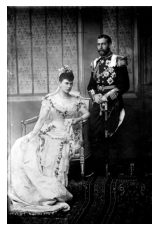

In [2]:
# read the image
X=imread('img102.jpg')

# plot the image
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [3]:
# The NumPy SVD Package: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
# SVD for image X
U, S, VT = np.linalg.svd(X,full_matrices=False) # The 'Economy' SVD
S = np.diag(S)

In [4]:
# look into the dimension of the X, U, S, VT
print('image X shape = ',X.shape)
print('U shape = ',U.shape)
print('Sigma shape = ',S.shape)
print('VT shape = ',VT.shape)

image X shape =  (1536, 1024)
U shape =  (1536, 1024)
Sigma shape =  (1024, 1024)
VT shape =  (1024, 1024)


In [5]:
# function to plot the compressed image, r = rank (max of r = 1024)
def plt_compress_img(r):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title(f'r = {r}')
  plt.show()


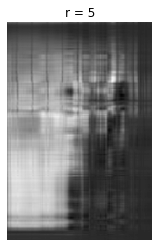

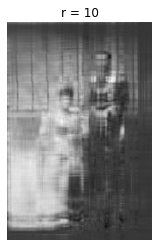

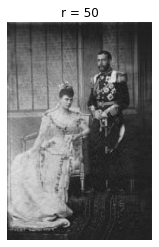

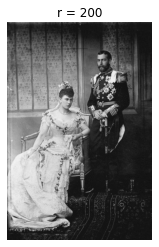

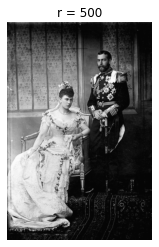

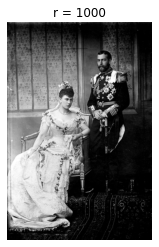

In [6]:
# define a list store different r value
r_range= [5,10,50,200,500,1000]

# plot the image for each r
for r in r_range:
  plt_compress_img(r=r)


## We can see that for r = 50 (max r = 1024), we can have relatively good quality image

## How much r should we choose? --- The Cumulative Singular Value over Sum Plot (Matrix S)

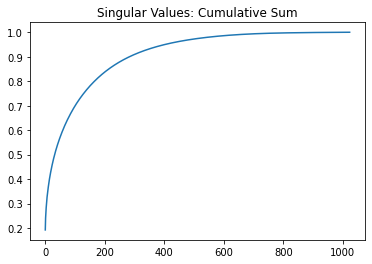

In [7]:
# plot the cumulative singular value over the sum
## S = singular value matrix

plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

Based on the Graph, probably the r = 400 is a good choice 

## Ahora con un Dataset

#### SVD decomposition and applications

SVD is a factorization used for solving linear equations, dimensionality reduction, data compression and so on.
It's based on the following decomposition:

`A=UΣV∗`
 
In which the matrix A **(m x n)** can be factorized into three matrices:

**U** *(m x m)* unitary matrix

**Σ** *(m x n)* rectangular diagonal matrix

**V** *(n x n)* unitary matrix

Columns of **V** are the eigenvectors of **A*A** called singular vectors

Columns of **U** are the eigenvectors of **AA*** called singular vectors

The elements on the diagonal of **Σ** are the ordered non-zero eigenvalues of both **A*A** and **AA*** called *singular values*

The proposed implementation of SVD consists of evaluating eigenvalues and eigenvectors of A*A with numpy library linalg.eig to get V and the singular values

Then the singular values are sorted, and so the singular vectors in V

We consider only non-zero singular values

Then U is computed solving the linear equation with A, V and Σ.

In [ ]:
def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

The singular values stored inside Σ have very different values, they indicates how much "relevant" that singular values are.
So we can just take the first k singular values, truncating Σ and consequently V and U.

In this way the matrix product is still doable and the resulting matrix has the same shape as the original.

If we use svd for dimensionality reduction we just need to keep U and Σ, because V is just used to *project the lower rank matrix **UΣ** into the previous dimension*.

In [11]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

### SVD for dimensionality reduction

We can see how svd decomposition applies to dimensionality reduction, in this example, using the **Iris dataset** available directly from library *sklearn*

In [15]:
iris = load_iris()
iris.keys()

data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

This is a custom version of the sns.pairplot with violins instead of histograms and scatters colored according to the class

In [16]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

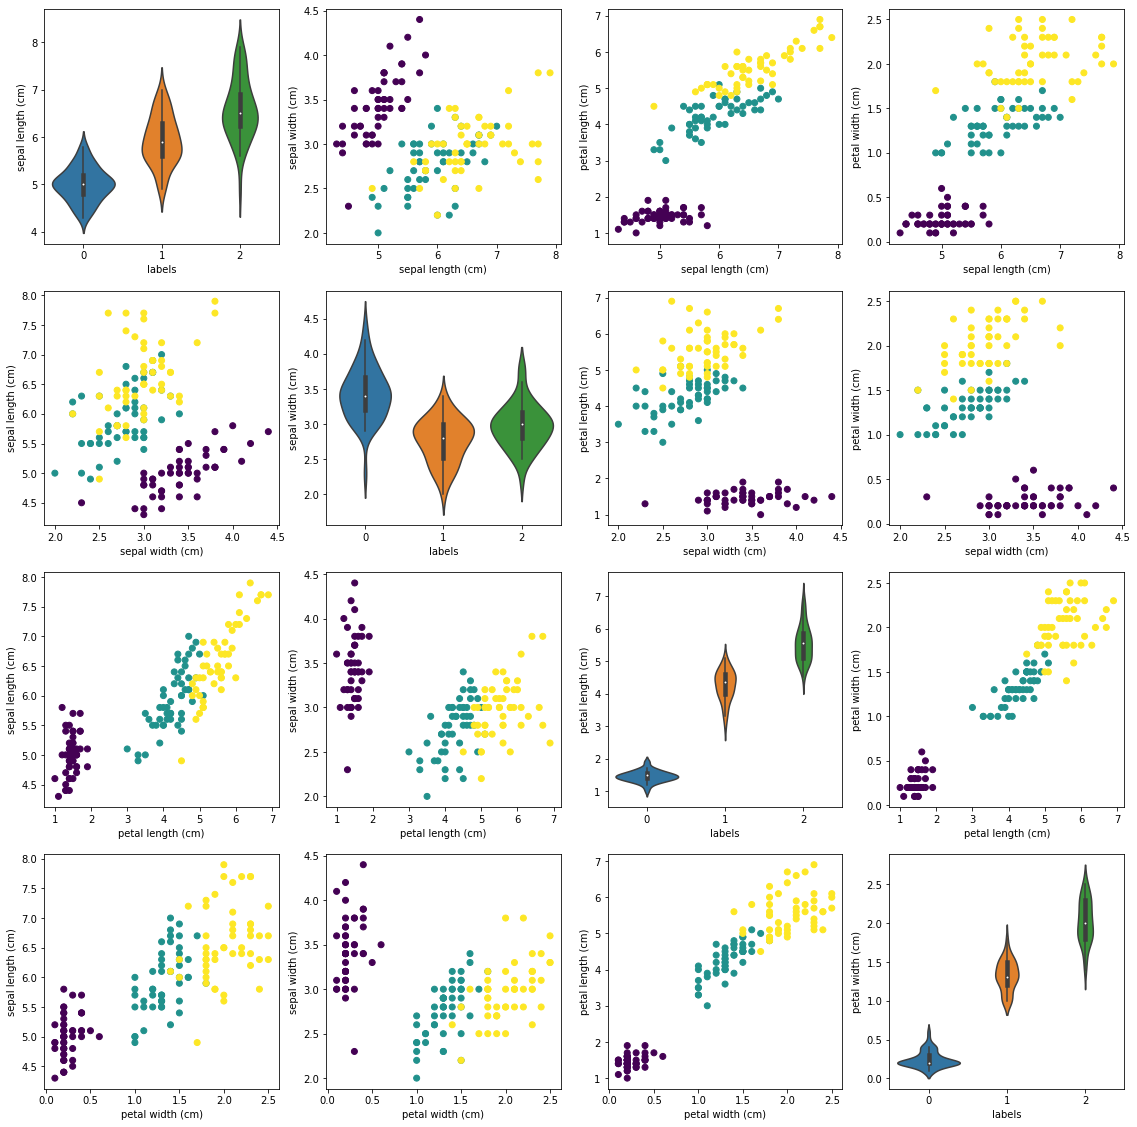

In [17]:
custom_pairplot(data, feature_names=feature_names, labels="labels")

Let's apply SVD decomposition to keep only two dimensions (k=2)

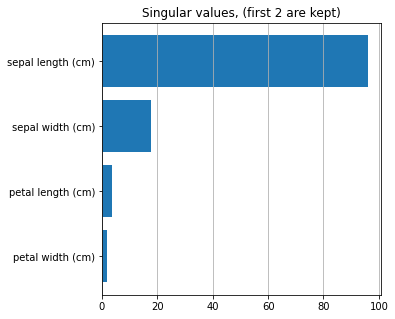

In [18]:
k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

As we can see, keeping two dimensions leads to quite well separated classes.
In this case working on 4 features instead of 2 is not a problem but in other context dimensionality reductions is almost mandatory

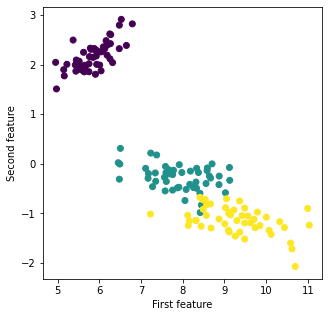

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");